In [1]:
### EP3MAC0417/MAC5768
##################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP, #
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO     #
# DESTE EP.                                                      #
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM,   #
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM          #
# DESONESTIDADE ACADÊMICA OU PLÁGIO.                             #
#                                                                #
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS        #
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A          #
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E        #
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS    #
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP.                           #
#                                                                #
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO         #
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR             #
# DESONESTIDADE ACADÊMICA.                                       #
#                                                                #
#                                                                #
# Nome: MARCUS VINICIUS FUGAGNOLI LARANJEIRA                     #
# NUSP: 5383459                                                  #
# Turma: MAC 0417/5768                                           #
# Prof.: Ronaldo Fumio Hashimoto                                 #
##################################################################

# EP 3 - Parte 2

Marcus Vinicius Fugagnoli Laranjeira - Número USP 5383459

In [2]:
import pandas as pd
import os

## Limpeza dos Metadados Gerados na Parte 1

In [3]:
df1 = pd.read_csv('metadados_1_ep3.csv', sep=';', decimal=',', encoding='cp1252')
df1.shape

(5400, 8)

In [4]:
# Filtrando as linhas onde Área, Diâmetro ou Minor são zero ou vazios
df1 = df1.dropna(subset=['Área', 'Diâmetro', 'Minor'])
df1 = df1[(df1['Área'] != 0) & (df1['Área'] != '') &
        (df1['Diâmetro'] != 0) & (df1['Diâmetro'] != '') &
        (df1['Minor'] != 0) & (df1['Minor'] != '')]

# Contando as ocorrências de cada combinação de Diretorio e Imagem
df1['Dir_Img'] = df1['Diretorio'] + df1['Imagem']
image_counts = df1['Dir_Img'].value_counts()

# Filtrando apenas as combinações que têm exatamente 3 linhas
valid_images = image_counts[image_counts == 3].index

# Mantendo apenas as linhas com essas combinações válidas
df1 = df1[df1['Dir_Img'].isin(valid_images)]

# Verificando se cada combinação tem n_contorno 0, 1 e 2
grouped = df1.groupby(['Diretorio', 'Imagem'])
valid_images = grouped.filter(lambda x: set(x['n_contorno']) == {0, 1, 2})[['Diretorio', 'Imagem']].drop_duplicates()

# Mantendo apenas as linhas com essas combinações válidas
df1 = df1.merge(valid_images, on=['Diretorio', 'Imagem'])

# Apagando a coluna 'Objeto' e 'Dir_Img'
df1 = df1.drop(columns=['Dir_Img'])

# Resetando o índice do dataframe resultante
df1.reset_index(drop=True, inplace=True)

# Exibindo o dataframe final
display(df1)


,Objeto,Classe,n_contorno,Área,Diâmetro,Minor,Diretorio,Imagem
0,NaN,NaN,0,250.5,6.586418,1.685623,.\originalGrayDataset,0011.png
1,NaN,NaN,1,168.5,3.236068,1.236068,.\originalGrayDataset,0011.png
2,NaN,NaN,2,98.0,27.016108,2.866696,.\originalGrayDataset,0011.png
3,NaN,NaN,0,121.5,7.492989,2.517998,.\originalGrayDataset,0016.png
4,NaN,NaN,1,84.5,5.417868,3.167227,.\originalGrayDataset,0016.png
...,...,...,...,...,...,...,...,...
1207,NaN,NaN,1,678.0,8.958893,2.356138,.\augmentedDataset\exp_transform,0598.png
1208,NaN,NaN,2,436.0,14.536967,3.689089,.\augmentedDataset\exp_transform,0598.png
1209,NaN,NaN,0,283.5,5.133805,1.542315,.\augmentedDataset\exp_transform,0600.png
1210,NaN,NaN,1,141.0,4.017191,2.890676,.\augmentedDataset\exp_transform,0600.png


In [5]:
df2 = pd.read_csv('metadados_2_ep3.csv', sep=';', decimal=',', encoding='cp1252')
df2.shape

(5400, 8)

In [6]:
# Filtrando as linhas onde Área, Diâmetro ou Minor são zero ou vazios
df2 = df2.dropna(subset=['Área', 'Diâmetro', 'Minor'])
df2 = df2[(df2['Área'] != 0) & (df2['Área'] != '') &
        (df2['Diâmetro'] != 0) & (df2['Diâmetro'] != '') &
        (df2['Minor'] != 0) & (df2['Minor'] != '')]

# Contando as ocorrências de cada combinação de Diretorio e Imagem
df2['Dir_Img'] = df2['Diretorio'] + df2['Imagem']
image_counts = df2['Dir_Img'].value_counts()

# Filtrando apenas as combinações que têm exatamente 3 linhas
valid_images = image_counts[image_counts == 3].index

# Mantendo apenas as linhas com essas combinações válidas
df2 = df2[df2['Dir_Img'].isin(valid_images)]

# Verificando se cada combinação tem n_contorno 0, 1 e 2
grouped = df2.groupby(['Diretorio', 'Imagem'])
valid_images = grouped.filter(lambda x: set(x['n_contorno']) == {0, 1, 2})[['Diretorio', 'Imagem']].drop_duplicates()

# Mantendo apenas as linhas com essas combinações válidas
df2 = df2.merge(valid_images, on=['Diretorio', 'Imagem'])

# Apagando a coluna 'Objeto' e 'Dir_Img'
df2 = df2.drop(columns=['Dir_Img'])

# Resetando o índice do dataframe resultante
df2.reset_index(drop=True, inplace=True)

# Exibindo o dataframe final
display(df2)


,Objeto,Classe,n_contorno,Área,Diâmetro,Minor,Diretorio,Imagem
0,NaN,NaN,0,10829.0,9.416367,3.550442,.\augmentedDataset\laplacian_img,0001.png
1,NaN,NaN,1,755.0,5.752354,2.459862,.\augmentedDataset\laplacian_img,0001.png
2,NaN,NaN,2,749.0,4.093338,1.563516,.\augmentedDataset\laplacian_img,0001.png
3,NaN,NaN,0,9666.0,5.133805,1.542315,.\augmentedDataset\laplacian_img,0003.png
4,NaN,NaN,1,7370.5,8.493728,1.921802,.\augmentedDataset\laplacian_img,0003.png
...,...,...,...,...,...,...,...,...
1195,NaN,NaN,1,276.0,2.828427,1.732051,.\augmentedDataset\mean_img,0594.png
1196,NaN,NaN,2,196.0,4.155375,1.905471,.\augmentedDataset\mean_img,0594.png
1197,NaN,NaN,0,145.0,6.342285,2.973565,.\augmentedDataset\mean_img,0600.png
1198,NaN,NaN,1,141.5,7.916228,1.885618,.\augmentedDataset\mean_img,0600.png


Total de 2412 linhas, 804 imagens aproveitáveis.

Por só termos um objeto por classe, a coluna "Objeto" será descartada

In [7]:
df = pd.concat([df1, df2], ignore_index=True)
df = df.drop(columns=['Objeto'])
df.to_csv('metadados_ep3_filtrado.csv', sep=';', decimal=',', index=False, encoding='cp1252')

In [8]:
display(df)

,Classe,n_contorno,Área,Diâmetro,Minor,Diretorio,Imagem
0,NaN,0,250.5,6.586418,1.685623,.\originalGrayDataset,0011.png
1,NaN,1,168.5,3.236068,1.236068,.\originalGrayDataset,0011.png
2,NaN,2,98.0,27.016108,2.866696,.\originalGrayDataset,0011.png
3,NaN,0,121.5,7.492989,2.517998,.\originalGrayDataset,0016.png
4,NaN,1,84.5,5.417868,3.167227,.\originalGrayDataset,0016.png
...,...,...,...,...,...,...,...
2407,NaN,1,276.0,2.828427,1.732051,.\augmentedDataset\mean_img,0594.png
2408,NaN,2,196.0,4.155375,1.905471,.\augmentedDataset\mean_img,0594.png
2409,NaN,0,145.0,6.342285,2.973565,.\augmentedDataset\mean_img,0600.png
2410,NaN,1,141.5,7.916228,1.885618,.\augmentedDataset\mean_img,0600.png


In [9]:
df['dir_bd'] = df['Diretorio']
df['dir_bd'] = df['dir_bd'].str.replace(r'.\\originalGrayDataset', r'.\\deteccaoBorda\\originalGrayDataset', regex=True)
df['dir_bd'] = df['dir_bd'].str.replace(r'.\\augmentedDataset\\contrast_stretching', r'.\\deteccaoBorda\\contrast_stretching', regex=True)
df['dir_bd'] = df['dir_bd'].str.replace(r'.\\augmentedDataset\\exp_transform', r'.\\deteccaoBorda\\exp_transform', regex=True)
df['dir_bd'] = df['dir_bd'].str.replace(r'.\\augmentedDataset\\laplacian_img', r'.\\deteccaoBorda\\laplacian_img', regex=True)
df['dir_bd'] = df['dir_bd'].str.replace(r'.\\augmentedDataset\\log_transform', r'.\\deteccaoBorda\\log_transform', regex=True)
df['dir_bd'] = df['dir_bd'].str.replace(r'.\\augmentedDataset\\mean_img', r'.\\deteccaoBorda\\mean_img', regex=True)

In [10]:
df

,Classe,n_contorno,Área,Diâmetro,Minor,Diretorio,Imagem,dir_bd
0,NaN,0,250.5,6.586418,1.685623,.\originalGrayDataset,0011.png,.\deteccaoBorda\originalGrayDataset
1,NaN,1,168.5,3.236068,1.236068,.\originalGrayDataset,0011.png,.\deteccaoBorda\originalGrayDataset
2,NaN,2,98.0,27.016108,2.866696,.\originalGrayDataset,0011.png,.\deteccaoBorda\originalGrayDataset
3,NaN,0,121.5,7.492989,2.517998,.\originalGrayDataset,0016.png,.\deteccaoBorda\originalGrayDataset
4,NaN,1,84.5,5.417868,3.167227,.\originalGrayDataset,0016.png,.\deteccaoBorda\originalGrayDataset
...,...,...,...,...,...,...,...,...
2407,NaN,1,276.0,2.828427,1.732051,.\augmentedDataset\mean_img,0594.png,.\deteccaoBorda\mean_img
2408,NaN,2,196.0,4.155375,1.905471,.\augmentedDataset\mean_img,0594.png,.\deteccaoBorda\mean_img
2409,NaN,0,145.0,6.342285,2.973565,.\augmentedDataset\mean_img,0600.png,.\deteccaoBorda\mean_img
2410,NaN,1,141.5,7.916228,1.885618,.\augmentedDataset\mean_img,0600.png,.\deteccaoBorda\mean_img


## Concatenação e Salvamento do Dataframe Completo

In [11]:
# Adicione uma coluna com o caminho completo das imagens
df['Caminho_Completo'] = df['dir_bd'].astype(str) + '\\' + df['Imagem'].astype(str)

# Crie um conjunto (set) com os caminhos completos normalizados para melhor performance na busca
caminhos_no_df = set(df['Caminho_Completo'].str.replace('\\', '/', regex=False).str.lower())

# Liste todos os diretórios únicos no dataframe
diretorios_unicos = df['dir_bd'].unique()

arqsttls = 0
arqsdels = 0
# Varra cada diretório
for diretorio in diretorios_unicos:
    # Liste todos os arquivos no diretório
    for root, dirs, files in os.walk(diretorio):
        for file in files:
            arqsttls += 1
            # Normaliza o caminho completo do arquivo
            caminho_completo = os.path.join(root, file).replace('\\', '/').lower()
            # Verifique se o caminho completo do arquivo está no dataframe
            if caminho_completo not in caminhos_no_df:
                arqsdels += 1
                # Apague o arquivo se não estiver no dataframe
                os.remove(caminho_completo)
                print(f"Arquivo {caminho_completo} apagado.")


print(f'Arquivos no total = {arqsttls} | Arquivos Deletados = {arqsdels} | Resultado = {arqsttls - arqsdels} imagens remanescentes.')


Arquivos no total = 804 | Arquivos Deletados = 0 | Resultado = 804 imagens remanescentes.


In [12]:
df

,Classe,n_contorno,Área,Diâmetro,Minor,Diretorio,Imagem,dir_bd,Caminho_Completo
0,NaN,0,250.5,6.586418,1.685623,.\originalGrayDataset,0011.png,.\deteccaoBorda\originalGrayDataset,.\deteccaoBorda\originalGrayDataset\0011.png
1,NaN,1,168.5,3.236068,1.236068,.\originalGrayDataset,0011.png,.\deteccaoBorda\originalGrayDataset,.\deteccaoBorda\originalGrayDataset\0011.png
2,NaN,2,98.0,27.016108,2.866696,.\originalGrayDataset,0011.png,.\deteccaoBorda\originalGrayDataset,.\deteccaoBorda\originalGrayDataset\0011.png
3,NaN,0,121.5,7.492989,2.517998,.\originalGrayDataset,0016.png,.\deteccaoBorda\originalGrayDataset,.\deteccaoBorda\originalGrayDataset\0016.png
4,NaN,1,84.5,5.417868,3.167227,.\originalGrayDataset,0016.png,.\deteccaoBorda\originalGrayDataset,.\deteccaoBorda\originalGrayDataset\0016.png
...,...,...,...,...,...,...,...,...,...
2407,NaN,1,276.0,2.828427,1.732051,.\augmentedDataset\mean_img,0594.png,.\deteccaoBorda\mean_img,.\deteccaoBorda\mean_img\0594.png
2408,NaN,2,196.0,4.155375,1.905471,.\augmentedDataset\mean_img,0594.png,.\deteccaoBorda\mean_img,.\deteccaoBorda\mean_img\0594.png
2409,NaN,0,145.0,6.342285,2.973565,.\augmentedDataset\mean_img,0600.png,.\deteccaoBorda\mean_img,.\deteccaoBorda\mean_img\0600.png
2410,NaN,1,141.5,7.916228,1.885618,.\augmentedDataset\mean_img,0600.png,.\deteccaoBorda\mean_img,.\deteccaoBorda\mean_img\0600.png


In [13]:
contador = 0
for root, dirs, files in os.walk('./deteccaoborda'):
    contador += len(files)
print(f"Total de arquivos no diretório ./deteccaoborda e seus subdiretórios: {contador}")

Total de arquivos no diretório ./deteccaoborda e seus subdiretórios: 804


In [14]:
df.to_csv('metadados_selecao_ep3.csv', sep=';', decimal=',', index=False, encoding='cp1252')

## Correspondência de Classes x Contornos nos Metadados

In [15]:
metadados = pd.read_csv('metadados.csv')
metadados_selecao_ep3 = pd.read_csv('metadados_selecao_ep3.csv', sep=';', decimal=',', encoding='cp1252')

# Função para mapear n_contorno para a classe correta
def mapear_classe(row):
    nome_arquivo = row['Imagem']
    n_contorno = row['n_contorno']
    
    # Encontra a linha correspondente no metadados.csv
    linha_correspondente = metadados[metadados['Nome Arquivo'] == nome_arquivo]
    
    # Seleciona a classe correta com base em n_contorno
    if n_contorno == 0:
        return linha_correspondente['Classe 1'].values[0]
    elif n_contorno == 1:
        return linha_correspondente['Classe 2'].values[0]
    elif n_contorno == 2:
        return linha_correspondente['Classe 3'].values[0]

# Aplicar a função para criar a coluna 'Classe' em metadados_selecao_ep3
metadados_selecao_ep3['Classe'] = metadados_selecao_ep3.apply(mapear_classe, axis=1)

display(metadados_selecao_ep3)

,Classe,n_contorno,Área,Diâmetro,Minor,Diretorio,Imagem,dir_bd,Caminho_Completo
0,Lâmpada,0,250.5,6.586418,1.685623,.\originalGrayDataset,0011.png,.\deteccaoBorda\originalGrayDataset,.\deteccaoBorda\originalGrayDataset\0011.png
1,Chave de Fenda,1,168.5,3.236068,1.236068,.\originalGrayDataset,0011.png,.\deteccaoBorda\originalGrayDataset,.\deteccaoBorda\originalGrayDataset\0011.png
2,Pincel,2,98.0,27.016108,2.866696,.\originalGrayDataset,0011.png,.\deteccaoBorda\originalGrayDataset,.\deteccaoBorda\originalGrayDataset\0011.png
3,Lâmpada,0,121.5,7.492989,2.517998,.\originalGrayDataset,0016.png,.\deteccaoBorda\originalGrayDataset,.\deteccaoBorda\originalGrayDataset\0016.png
4,Cadeado,1,84.5,5.417868,3.167227,.\originalGrayDataset,0016.png,.\deteccaoBorda\originalGrayDataset,.\deteccaoBorda\originalGrayDataset\0016.png
...,...,...,...,...,...,...,...,...,...
2407,Pilha,1,276.0,2.828427,1.732051,.\augmentedDataset\mean_img,0594.png,.\deteccaoBorda\mean_img,.\deteccaoBorda\mean_img\0594.png
2408,Pinça,2,196.0,4.155375,1.905471,.\augmentedDataset\mean_img,0594.png,.\deteccaoBorda\mean_img,.\deteccaoBorda\mean_img\0594.png
2409,Pilha,0,145.0,6.342285,2.973565,.\augmentedDataset\mean_img,0600.png,.\deteccaoBorda\mean_img,.\deteccaoBorda\mean_img\0600.png
2410,Pinça,1,141.5,7.916228,1.885618,.\augmentedDataset\mean_img,0600.png,.\deteccaoBorda\mean_img,.\deteccaoBorda\mean_img\0600.png


In [16]:
metadados_selecao_ep3.to_csv('metadados_selecao_ep3.csv', sep=';', decimal=',', index=False, encoding='cp1252')

## Escolha Manual de Imagens

Foi feita uma seleção manual a partir da verificação de todas as imagens que tiveram as bordas detectadas.

A seleção foi feita visualmente utilizando o software de classificação e organização de fotografias, Adobe Bridge.

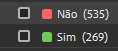

Após isso, utilizando-se de uma ferramenta de leitura de metadados (exiftool), criei uma lista das imagens com rótulo "Sim" para então gerar a lista de imagens que serão consideradas abaixo. 

In [23]:
imagens_uteis = ['.\\deteccaoBorda\\contrast_stretching\\0004.png', '.\\deteccaoBorda\\contrast_stretching\\0010.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0017.png', '.\\deteccaoBorda\\contrast_stretching\\0030.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0052.png', '.\\deteccaoBorda\\contrast_stretching\\0062.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0067.png', '.\\deteccaoBorda\\contrast_stretching\\0074.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0077.png', '.\\deteccaoBorda\\contrast_stretching\\0093.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0099.png', '.\\deteccaoBorda\\contrast_stretching\\0100.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0102.png', '.\\deteccaoBorda\\contrast_stretching\\0111.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0123.png', '.\\deteccaoBorda\\contrast_stretching\\0124.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0126.png', '.\\deteccaoBorda\\contrast_stretching\\0136.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0139.png', '.\\deteccaoBorda\\contrast_stretching\\0140.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0141.png', '.\\deteccaoBorda\\contrast_stretching\\0142.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0144.png', '.\\deteccaoBorda\\contrast_stretching\\0146.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0148.png', '.\\deteccaoBorda\\contrast_stretching\\0149.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0150.png', '.\\deteccaoBorda\\contrast_stretching\\0154.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0155.png', '.\\deteccaoBorda\\contrast_stretching\\0157.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0158.png', '.\\deteccaoBorda\\contrast_stretching\\0159.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0162.png', '.\\deteccaoBorda\\contrast_stretching\\0164.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0169.png', '.\\deteccaoBorda\\contrast_stretching\\0170.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0178.png', '.\\deteccaoBorda\\contrast_stretching\\0184.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0185.png', '.\\deteccaoBorda\\contrast_stretching\\0200.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0207.png', '.\\deteccaoBorda\\contrast_stretching\\0208.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0217.png', '.\\deteccaoBorda\\contrast_stretching\\0221.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0222.png', '.\\deteccaoBorda\\contrast_stretching\\0224.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0232.png', '.\\deteccaoBorda\\contrast_stretching\\0233.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0234.png', '.\\deteccaoBorda\\contrast_stretching\\0277.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0312.png', '.\\deteccaoBorda\\contrast_stretching\\0323.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0355.png', '.\\deteccaoBorda\\contrast_stretching\\0560.png',
                 '.\\deteccaoBorda\\contrast_stretching\\0590.png', '.\\deteccaoBorda\\contrast_stretching\\0597.png',
                 '.\\deteccaoBorda\\exp_transform\\0005.png', '.\\deteccaoBorda\\exp_transform\\0010.png',
                 '.\\deteccaoBorda\\exp_transform\\0011.png', '.\\deteccaoBorda\\exp_transform\\0012.png',
                 '.\\deteccaoBorda\\exp_transform\\0026.png', '.\\deteccaoBorda\\exp_transform\\0028.png',
                 '.\\deteccaoBorda\\exp_transform\\0034.png', '.\\deteccaoBorda\\exp_transform\\0035.png',
                 '.\\deteccaoBorda\\exp_transform\\0038.png', '.\\deteccaoBorda\\exp_transform\\0043.png',
                 '.\\deteccaoBorda\\exp_transform\\0070.png', '.\\deteccaoBorda\\exp_transform\\0080.png',
                 '.\\deteccaoBorda\\exp_transform\\0082.png', '.\\deteccaoBorda\\exp_transform\\0083.png',
                 '.\\deteccaoBorda\\exp_transform\\0084.png', '.\\deteccaoBorda\\exp_transform\\0091.png',
                 '.\\deteccaoBorda\\exp_transform\\0094.png', '.\\deteccaoBorda\\exp_transform\\0106.png',
                 '.\\deteccaoBorda\\exp_transform\\0107.png', '.\\deteccaoBorda\\exp_transform\\0114.png',
                 '.\\deteccaoBorda\\exp_transform\\0115.png', '.\\deteccaoBorda\\exp_transform\\0124.png',
                 '.\\deteccaoBorda\\exp_transform\\0125.png', '.\\deteccaoBorda\\exp_transform\\0138.png',
                 '.\\deteccaoBorda\\exp_transform\\0140.png', '.\\deteccaoBorda\\exp_transform\\0142.png',
                 '.\\deteccaoBorda\\exp_transform\\0145.png', '.\\deteccaoBorda\\exp_transform\\0147.png',
                 '.\\deteccaoBorda\\exp_transform\\0150.png', '.\\deteccaoBorda\\exp_transform\\0154.png',
                 '.\\deteccaoBorda\\exp_transform\\0155.png', '.\\deteccaoBorda\\exp_transform\\0156.png',
                 '.\\deteccaoBorda\\exp_transform\\0159.png', '.\\deteccaoBorda\\exp_transform\\0162.png',
                 '.\\deteccaoBorda\\exp_transform\\0169.png', '.\\deteccaoBorda\\exp_transform\\0177.png',
                 '.\\deteccaoBorda\\exp_transform\\0178.png', '.\\deteccaoBorda\\exp_transform\\0179.png',
                 '.\\deteccaoBorda\\exp_transform\\0206.png', '.\\deteccaoBorda\\exp_transform\\0208.png',
                 '.\\deteccaoBorda\\exp_transform\\0209.png', '.\\deteccaoBorda\\exp_transform\\0218.png',
                 '.\\deteccaoBorda\\exp_transform\\0219.png', '.\\deteccaoBorda\\exp_transform\\0223.png',
                 '.\\deteccaoBorda\\exp_transform\\0232.png', '.\\deteccaoBorda\\exp_transform\\0233.png',
                 '.\\deteccaoBorda\\exp_transform\\0235.png', '.\\deteccaoBorda\\exp_transform\\0236.png',
                 '.\\deteccaoBorda\\exp_transform\\0310.png', '.\\deteccaoBorda\\exp_transform\\0315.png',
                 '.\\deteccaoBorda\\exp_transform\\0322.png', '.\\deteccaoBorda\\exp_transform\\0327.png',
                 '.\\deteccaoBorda\\exp_transform\\0343.png', '.\\deteccaoBorda\\exp_transform\\0372.png',
                 '.\\deteccaoBorda\\exp_transform\\0399.png', '.\\deteccaoBorda\\exp_transform\\0410.png',
                 '.\\deteccaoBorda\\exp_transform\\0425.png', '.\\deteccaoBorda\\exp_transform\\0587.png',
                 '.\\deteccaoBorda\\laplacian_img\\0312.png', '.\\deteccaoBorda\\laplacian_img\\0322.png',
                 '.\\deteccaoBorda\\laplacian_img\\0340.png', '.\\deteccaoBorda\\laplacian_img\\0349.png',
                 '.\\deteccaoBorda\\laplacian_img\\0417.png', '.\\deteccaoBorda\\log_transform\\0001.png',
                 '.\\deteccaoBorda\\log_transform\\0056.png', '.\\deteccaoBorda\\log_transform\\0067.png',
                 '.\\deteccaoBorda\\log_transform\\0078.png', '.\\deteccaoBorda\\log_transform\\0082.png',
                 '.\\deteccaoBorda\\log_transform\\0083.png', '.\\deteccaoBorda\\log_transform\\0098.png',
                 '.\\deteccaoBorda\\log_transform\\0122.png', '.\\deteccaoBorda\\log_transform\\0126.png',
                 '.\\deteccaoBorda\\log_transform\\0128.png', '.\\deteccaoBorda\\log_transform\\0142.png',
                 '.\\deteccaoBorda\\log_transform\\0147.png', '.\\deteccaoBorda\\log_transform\\0148.png',
                 '.\\deteccaoBorda\\log_transform\\0150.png', '.\\deteccaoBorda\\log_transform\\0151.png',
                 '.\\deteccaoBorda\\log_transform\\0152.png', '.\\deteccaoBorda\\log_transform\\0155.png',
                 '.\\deteccaoBorda\\log_transform\\0156.png', '.\\deteccaoBorda\\log_transform\\0160.png',
                 '.\\deteccaoBorda\\log_transform\\0162.png', '.\\deteccaoBorda\\log_transform\\0164.png',
                 '.\\deteccaoBorda\\log_transform\\0165.png', '.\\deteccaoBorda\\log_transform\\0167.png',
                 '.\\deteccaoBorda\\log_transform\\0168.png', '.\\deteccaoBorda\\log_transform\\0174.png',
                 '.\\deteccaoBorda\\log_transform\\0181.png', '.\\deteccaoBorda\\log_transform\\0182.png',
                 '.\\deteccaoBorda\\log_transform\\0183.png', '.\\deteccaoBorda\\log_transform\\0184.png',
                 '.\\deteccaoBorda\\log_transform\\0188.png', '.\\deteccaoBorda\\log_transform\\0196.png',
                 '.\\deteccaoBorda\\log_transform\\0202.png', '.\\deteccaoBorda\\log_transform\\0207.png',
                 '.\\deteccaoBorda\\log_transform\\0208.png', '.\\deteccaoBorda\\log_transform\\0218.png',
                 '.\\deteccaoBorda\\log_transform\\0220.png', '.\\deteccaoBorda\\log_transform\\0231.png',
                 '.\\deteccaoBorda\\log_transform\\0233.png', '.\\deteccaoBorda\\log_transform\\0383.png',
                 '.\\deteccaoBorda\\log_transform\\0388.png', '.\\deteccaoBorda\\log_transform\\0449.png',
                 '.\\deteccaoBorda\\log_transform\\0454.png', '.\\deteccaoBorda\\log_transform\\0575.png',
                 '.\\deteccaoBorda\\mean_img\\0011.png', '.\\deteccaoBorda\\mean_img\\0023.png',
                 '.\\deteccaoBorda\\mean_img\\0026.png', '.\\deteccaoBorda\\mean_img\\0032.png',
                 '.\\deteccaoBorda\\mean_img\\0035.png', '.\\deteccaoBorda\\mean_img\\0039.png',
                 '.\\deteccaoBorda\\mean_img\\0041.png', '.\\deteccaoBorda\\mean_img\\0070.png',
                 '.\\deteccaoBorda\\mean_img\\0074.png', '.\\deteccaoBorda\\mean_img\\0081.png',
                 '.\\deteccaoBorda\\mean_img\\0089.png', '.\\deteccaoBorda\\mean_img\\0093.png',
                 '.\\deteccaoBorda\\mean_img\\0124.png', '.\\deteccaoBorda\\mean_img\\0126.png',
                 '.\\deteccaoBorda\\mean_img\\0128.png', '.\\deteccaoBorda\\mean_img\\0138.png',
                 '.\\deteccaoBorda\\mean_img\\0144.png', '.\\deteccaoBorda\\mean_img\\0145.png',
                 '.\\deteccaoBorda\\mean_img\\0150.png', '.\\deteccaoBorda\\mean_img\\0153.png',
                 '.\\deteccaoBorda\\mean_img\\0156.png', '.\\deteccaoBorda\\mean_img\\0159.png',
                 '.\\deteccaoBorda\\mean_img\\0160.png', '.\\deteccaoBorda\\mean_img\\0162.png',
                 '.\\deteccaoBorda\\mean_img\\0169.png', '.\\deteccaoBorda\\mean_img\\0170.png',
                 '.\\deteccaoBorda\\mean_img\\0175.png', '.\\deteccaoBorda\\mean_img\\0176.png',
                 '.\\deteccaoBorda\\mean_img\\0177.png', '.\\deteccaoBorda\\mean_img\\0183.png',
                 '.\\deteccaoBorda\\mean_img\\0184.png', '.\\deteccaoBorda\\mean_img\\0185.png',
                 '.\\deteccaoBorda\\mean_img\\0200.png', '.\\deteccaoBorda\\mean_img\\0206.png',
                 '.\\deteccaoBorda\\mean_img\\0210.png', '.\\deteccaoBorda\\mean_img\\0212.png',
                 '.\\deteccaoBorda\\mean_img\\0213.png', '.\\deteccaoBorda\\mean_img\\0217.png',
                 '.\\deteccaoBorda\\mean_img\\0219.png', '.\\deteccaoBorda\\mean_img\\0221.png',
                 '.\\deteccaoBorda\\mean_img\\0222.png', '.\\deteccaoBorda\\mean_img\\0224.png',
                 '.\\deteccaoBorda\\mean_img\\0231.png', '.\\deteccaoBorda\\mean_img\\0232.png',
                 '.\\deteccaoBorda\\mean_img\\0233.png', '.\\deteccaoBorda\\mean_img\\0234.png',
                 '.\\deteccaoBorda\\mean_img\\0235.png', '.\\deteccaoBorda\\mean_img\\0240.png',
                 '.\\deteccaoBorda\\mean_img\\0290.png', '.\\deteccaoBorda\\mean_img\\0311.png',
                 '.\\deteccaoBorda\\mean_img\\0370.png', '.\\deteccaoBorda\\originalGrayDataset\\0011.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0016.png', '.\\deteccaoBorda\\originalGrayDataset\\0024.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0035.png', '.\\deteccaoBorda\\originalGrayDataset\\0051.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0053.png', '.\\deteccaoBorda\\originalGrayDataset\\0056.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0074.png', '.\\deteccaoBorda\\originalGrayDataset\\0077.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0078.png', '.\\deteccaoBorda\\originalGrayDataset\\0082.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0087.png', '.\\deteccaoBorda\\originalGrayDataset\\0088.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0093.png', '.\\deteccaoBorda\\originalGrayDataset\\0097.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0099.png', '.\\deteccaoBorda\\originalGrayDataset\\0117.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0123.png', '.\\deteccaoBorda\\originalGrayDataset\\0124.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0126.png', '.\\deteccaoBorda\\originalGrayDataset\\0136.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0139.png', '.\\deteccaoBorda\\originalGrayDataset\\0140.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0142.png', '.\\deteccaoBorda\\originalGrayDataset\\0144.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0147.png', '.\\deteccaoBorda\\originalGrayDataset\\0149.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0150.png', '.\\deteccaoBorda\\originalGrayDataset\\0155.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0157.png', '.\\deteccaoBorda\\originalGrayDataset\\0158.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0159.png', '.\\deteccaoBorda\\originalGrayDataset\\0162.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0164.png', '.\\deteccaoBorda\\originalGrayDataset\\0167.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0169.png', '.\\deteccaoBorda\\originalGrayDataset\\0170.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0175.png', '.\\deteccaoBorda\\originalGrayDataset\\0176.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0177.png', '.\\deteccaoBorda\\originalGrayDataset\\0188.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0200.png', '.\\deteccaoBorda\\originalGrayDataset\\0206.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0207.png', '.\\deteccaoBorda\\originalGrayDataset\\0210.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0212.png', '.\\deteccaoBorda\\originalGrayDataset\\0213.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0217.png', '.\\deteccaoBorda\\originalGrayDataset\\0224.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0231.png', '.\\deteccaoBorda\\originalGrayDataset\\0234.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0235.png', '.\\deteccaoBorda\\originalGrayDataset\\0277.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0314.png', '.\\deteccaoBorda\\originalGrayDataset\\0319.png',
                 '.\\deteccaoBorda\\originalGrayDataset\\0585.png']

In [24]:
df_filtrado = metadados_selecao_ep3.copy()[df['Caminho_Completo'].isin(imagens_uteis)]

In [25]:
df_filtrado

,Classe,n_contorno,Área,Diâmetro,Minor,Diretorio,Imagem,dir_bd,Caminho_Completo
0,Lâmpada,0,250.5,6.586418,1.685623,.\originalGrayDataset,0011.png,.\deteccaoBorda\originalGrayDataset,.\deteccaoBorda\originalGrayDataset\0011.png
1,Chave de Fenda,1,168.5,3.236068,1.236068,.\originalGrayDataset,0011.png,.\deteccaoBorda\originalGrayDataset,.\deteccaoBorda\originalGrayDataset\0011.png
2,Pincel,2,98.0,27.016108,2.866696,.\originalGrayDataset,0011.png,.\deteccaoBorda\originalGrayDataset,.\deteccaoBorda\originalGrayDataset\0011.png
3,Lâmpada,0,121.5,7.492989,2.517998,.\originalGrayDataset,0016.png,.\deteccaoBorda\originalGrayDataset,.\deteccaoBorda\originalGrayDataset\0016.png
4,Cadeado,1,84.5,5.417868,3.167227,.\originalGrayDataset,0016.png,.\deteccaoBorda\originalGrayDataset,.\deteccaoBorda\originalGrayDataset\0016.png
...,...,...,...,...,...,...,...,...,...
2308,Rolha,1,54.0,5.391920,1.427692,.\augmentedDataset\mean_img,0311.png,.\deteccaoBorda\mean_img,.\deteccaoBorda\mean_img\0311.png
2309,Pincel,2,14.5,3.829708,1.885618,.\augmentedDataset\mean_img,0311.png,.\deteccaoBorda\mean_img,.\deteccaoBorda\mean_img\0311.png
2313,Lâmpada,0,992.5,10.817213,2.968200,.\augmentedDataset\mean_img,0370.png,.\deteccaoBorda\mean_img,.\deteccaoBorda\mean_img\0370.png
2314,Chave de Fenda,1,115.0,6.457484,2.816657,.\augmentedDataset\mean_img,0370.png,.\deteccaoBorda\mean_img,.\deteccaoBorda\mean_img\0370.png


In [27]:
print(f'Total de imagens aproveitáveis nos metadados: {len(df_filtrado["Caminho_Completo"].value_counts())}')

Total de imagens aproveitáveis nos metadados: 269


In [28]:
df_filtrado.drop(columns=['dir_bd', 'Caminho_Completo'], inplace=True)

In [29]:
df_filtrado.to_csv('metadados_selecao_final_ep3.csv', sep=';', decimal=',', index=False, encoding='cp1252')

### FIM EP3 - Parte 2

<hr style="border: 0; border-top: 10px solid black; width: 85%; margin: 0 auto;">